In [1]:
#Process whole slide images
import openslide
from PIL import Image
import skimage
import imageio
import os,sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage

In [2]:
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import nucleus
import tensorflow._api.v2.compat.v1 as tf
tf.disable_v2_behavior()
config = nucleus.NucleusInferenceConfig()
config.display()
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
with tf.device(DEVICE):
    nmodel = modellib.MaskRCNN(mode="inference",
                              model_dir=os.getcwd(),
                              config=config)
weights_path = "/data/zrf/Nuclei_Segmentation_rcnn/mask_rcnn_weights.h5"
nmodel.load_weights(weights_path, by_name=True)  

2023-09-20 02:09:52.385222: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-20 02:09:53.488074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 02:09:57.606780: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0

2023-09-20 02:10:08.234560: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-09-20 02:10:08.441929: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-09-20 02:10:08.906524: W tensorflow/c/c_api.cc:300] Operation '{name:'fpn_c5p5/kernel/Assign' id:2577 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node fpn_c5p5/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](fpn_c5p5/kernel, fpn_c5p5/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no 

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  float64
molded_images            shape: (1, 1024, 1024, 3)    min:  -51.28000  max:  213.03791  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


/data/zrf/anaconda3/envs/tf2/lib/python3.9/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-09-20 02:17:43.563161: W tensorflow/c/c_api.cc:300] Operation '{name:'mrcnn_detection/Reshape_1' id:3926 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node mrcnn_detection/Reshape_1}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _has_manual_control_dependencies=true, _device="/device:CPU:0"](mrcnn_detection/packed, mrcnn_detection/Reshape_1/shape)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-09-20 02:17:44.258878: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAn

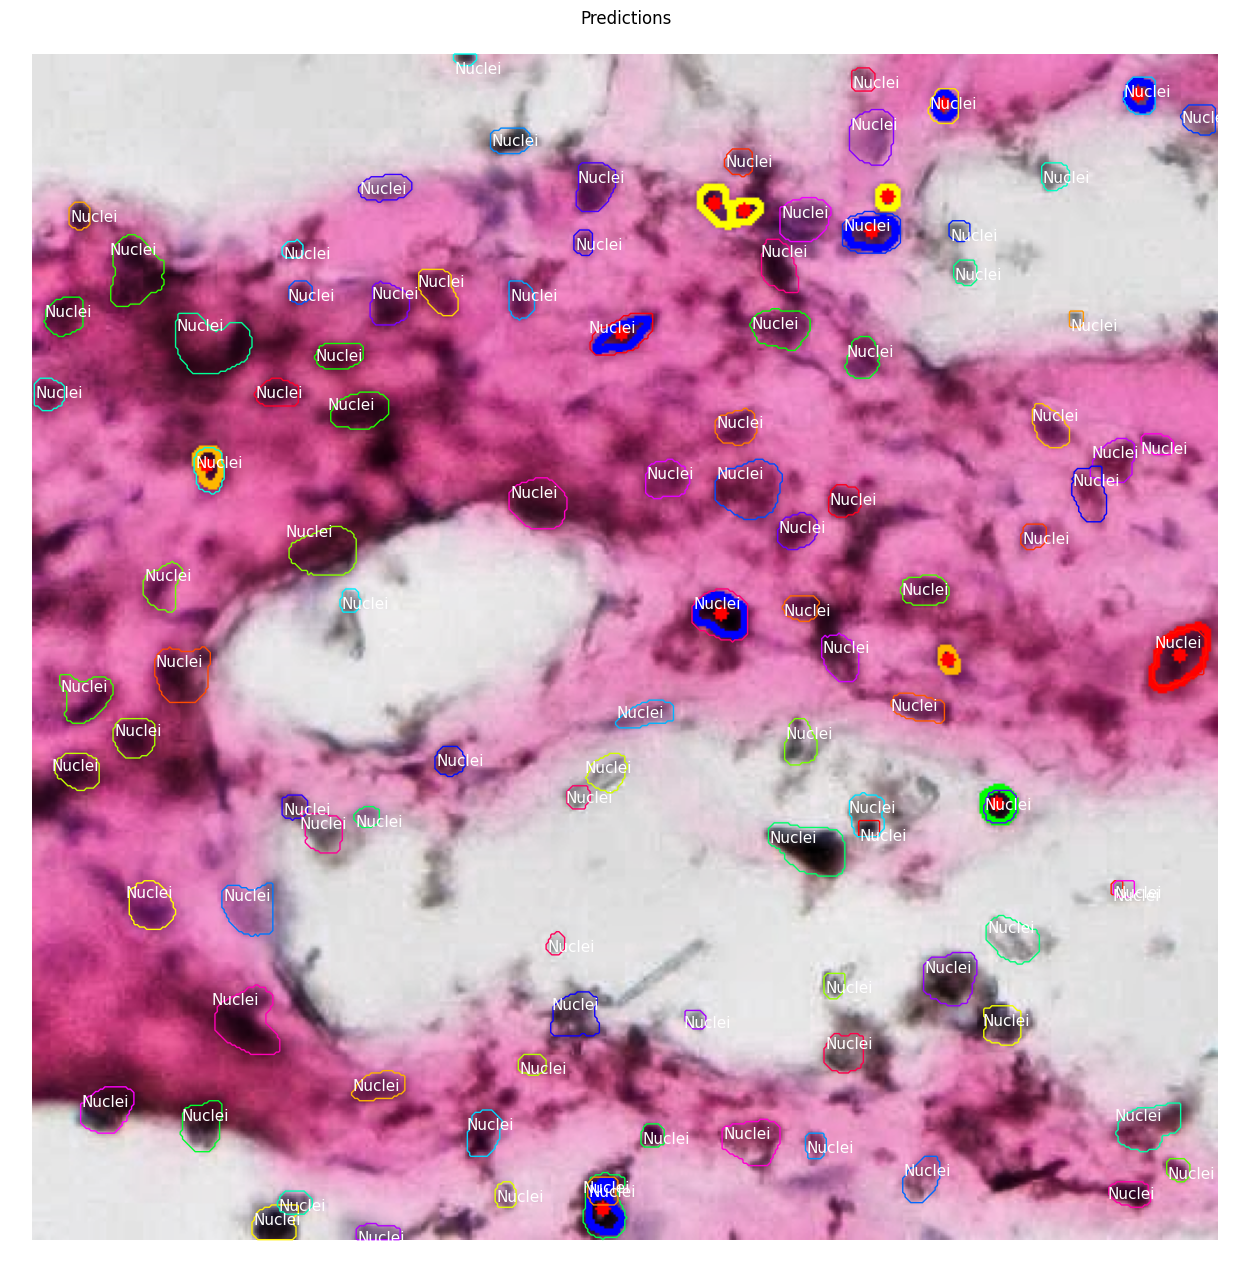

In [3]:
# Run detection and predict nuclei on a patch
img=Image.open('/data/zrf/data/cell_segjwy/hover/overlay/2560_12800_189.png')
im_patch = np.array(img)

im_patch = skimage.exposure.equalize_adapthist(im_patch)
im_patch = skimage.exposure.adjust_log(im_patch)
im_patch = im_patch*255.0
results = nmodel.detect([im_patch], verbose=1)
r = results[0]
visualize.display_instances(im_patch, r['rois'], r['masks'],r['class_ids'],['BG', 'Nuclei'],
                      figsize=(16, 16), ax=None,
                      show_mask=False, show_bbox=False,
                      title="Predictions")  